In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import get_window
from scipy.stats import kurtosis
from scipy.signal import welch

Exercise 1

In [7]:
def calculate_features(sample, file_name):
    # Dynamically extract the column names for bearing 4
    columns = sample.columns
    # b4x_cols = columns[columns.str.contains('b4x', case=False)]
    # b4y_cols = columns[columns.str.contains('b4y', case=False)]
    
    # if b4x_cols.empty or b4y_cols.empty:
    #     print(f"Warning: Columns 'b4x' or 'b4y' not found in file {file_name}")
    #     return None
    
    b4x_col = b4x_cols.values[0]
    b4y_col = b4y_cols.values[0]
    
    # Extract acceleration data
    b4x = sample[b4x_col]
    b4y = sample[b4y_col]
    
    # Calculate mean, standard deviation, and RMS
    mean_x = np.mean(b4x)
    mean_y = np.mean(b4y)
    std_x = np.std(b4x)
    std_y = np.std(b4y)
    rms_x = np.sqrt(np.mean(b4x**2))
    rms_y = np.sqrt(np.mean(b4y**2))
    
    # Calculate spectral flatness
    _, Pxx_x = welch(b4x)
    spectral_flatness_x = np.exp(np.mean(np.log(Pxx_x))) / np.mean(Pxx_x)
    _, Pxy_y = welch(b4y)
    spectral_flatness_y = np.exp(np.mean(np.log(Pxy_y))) / np.mean(Pxy_y)
    
    # Calculate kurtosis as an additional feature
    kurtosis_x = kurtosis(b4x)
    kurtosis_y = kurtosis(b4y)
    
    features = {
        'mean_x': mean_x,
        'mean_y': mean_y,
        'std_x': std_x,
        'std_y': std_y,
        'rms_x': rms_x,
        'rms_y': rms_y,
        'spectral_flatness_x': spectral_flatness_x,
        'spectral_flatness_y': spectral_flatness_y,
        'kurtosis_x': kurtosis_x,
        'kurtosis_y': kurtosis_y
    }
    
    return features

In [20]:
import pandas as pd
import os
from pathlib import Path
from sklearn.impute import KNNImputer
train_data_dir = Path('train')

# Inspect the first file's columns
sample_file = os.path.join(train_data_dir, '0.csv')
sample_df = pd.read_csv(sample_file, sep=';')

bearing_data = pd.read_csv(sample_file, delimiter=';')    
bearing_data['x_velocity'] = bearing_data['b4x'].diff()
bearing_data['x_acceleration'] = bearing_data['x_velocity'].diff()
bearing_data['y_velocity'] = bearing_data['b4y'].diff()
bearing_data['y_acceleration'] = bearing_data['y_velocity'].diff()

# Impute the missing values
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(bearing_data)
bearing_data = pd.DataFrame(data_imputed, columns=bearing_data.columns)

bearing_data
    

,b1x,b1y,b4x,b4y,x_velocity,x_acceleration,y_velocity,y_acceleration
0,-0.022,-0.039,-0.129,-0.142,-0.0046,0.0236,-0.0192,0.0146
1,-0.105,-0.017,-0.115,-0.122,0.0140,0.0680,0.0200,0.0476
2,-0.183,-0.098,-0.171,-0.071,-0.0560,-0.0700,0.0510,0.0310
3,-0.178,-0.161,-0.112,-0.078,0.0590,0.1150,-0.0070,-0.0580
4,-0.208,-0.129,-0.063,-0.066,0.0490,-0.0100,0.0120,0.0190
...,...,...,...,...,...,...,...,...
20475,-0.022,-0.142,-0.134,-0.093,-0.0270,0.0340,0.0140,0.0480
20476,0.024,-0.156,-0.227,-0.132,-0.0930,-0.0660,-0.0390,-0.0530
20477,-0.193,-0.303,-0.151,0.007,0.0760,0.1690,0.1390,0.1780
20478,-0.115,0.076,-0.151,-0.005,0.0000,-0.0760,-0.0120,-0.1510


In [23]:
# List to store feature data
feature_list = []

# Iterate over each file in the directory
for file_name in os.listdir(train_data_dir):        
    sample_file = os.path.join(train_data_dir, file_name)
    sample_df = pd.read_csv(sample_file, sep=';')
    
    # Calculate features
    features = calculate_features(sample_df, file_name)
    
    if features:
        # Add the file name to the features
        features['file'] = file_name
        
        # Append the features to the list
        feature_list.append(features)

# Create a DataFrame from the feature list
feature_df = pd.DataFrame(feature_list)

feature_df

,mean_x,mean_y,std_x,std_y,rms_x,rms_y,spectral_flatness_x,spectral_flatness_y,kurtosis_x,kurtosis_y,file
0,-0.090969,-0.094235,0.060085,0.066380,0.109020,0.115267,0.596261,0.804498,0.790250,1.807990,0.csv
1,-0.091260,-0.087946,0.059420,0.064744,0.108900,0.109208,0.584145,0.783668,1.234703,1.873189,1.csv
2,-0.077442,-0.092548,0.059236,0.066302,0.097500,0.113846,0.592749,0.779913,0.808053,1.520737,10.csv
3,-0.093076,-0.092855,0.063373,0.068732,0.112602,0.115525,0.641669,0.818774,0.553181,1.142888,100.csv
4,-0.114358,-0.120604,0.082442,0.082352,0.140977,0.146038,0.508304,0.784076,1.277742,0.805210,1000.csv
...,...,...,...,...,...,...,...,...,...,...,...
288,-0.114863,-0.114734,0.094783,0.100513,0.148921,0.152534,0.542126,0.728396,2.247974,1.447407,1257.csv
289,-0.114929,-0.114242,0.092485,0.101530,0.147520,0.152838,0.566459,0.715986,2.040679,1.348293,1258.csv
290,-0.115394,-0.115230,0.093686,0.099984,0.148636,0.152561,0.557057,0.736812,1.501953,1.103627,1259.csv
291,-0.092892,-0.093317,0.062944,0.068421,0.112209,0.115713,0.643962,0.813113,0.789755,1.334046,126.csv


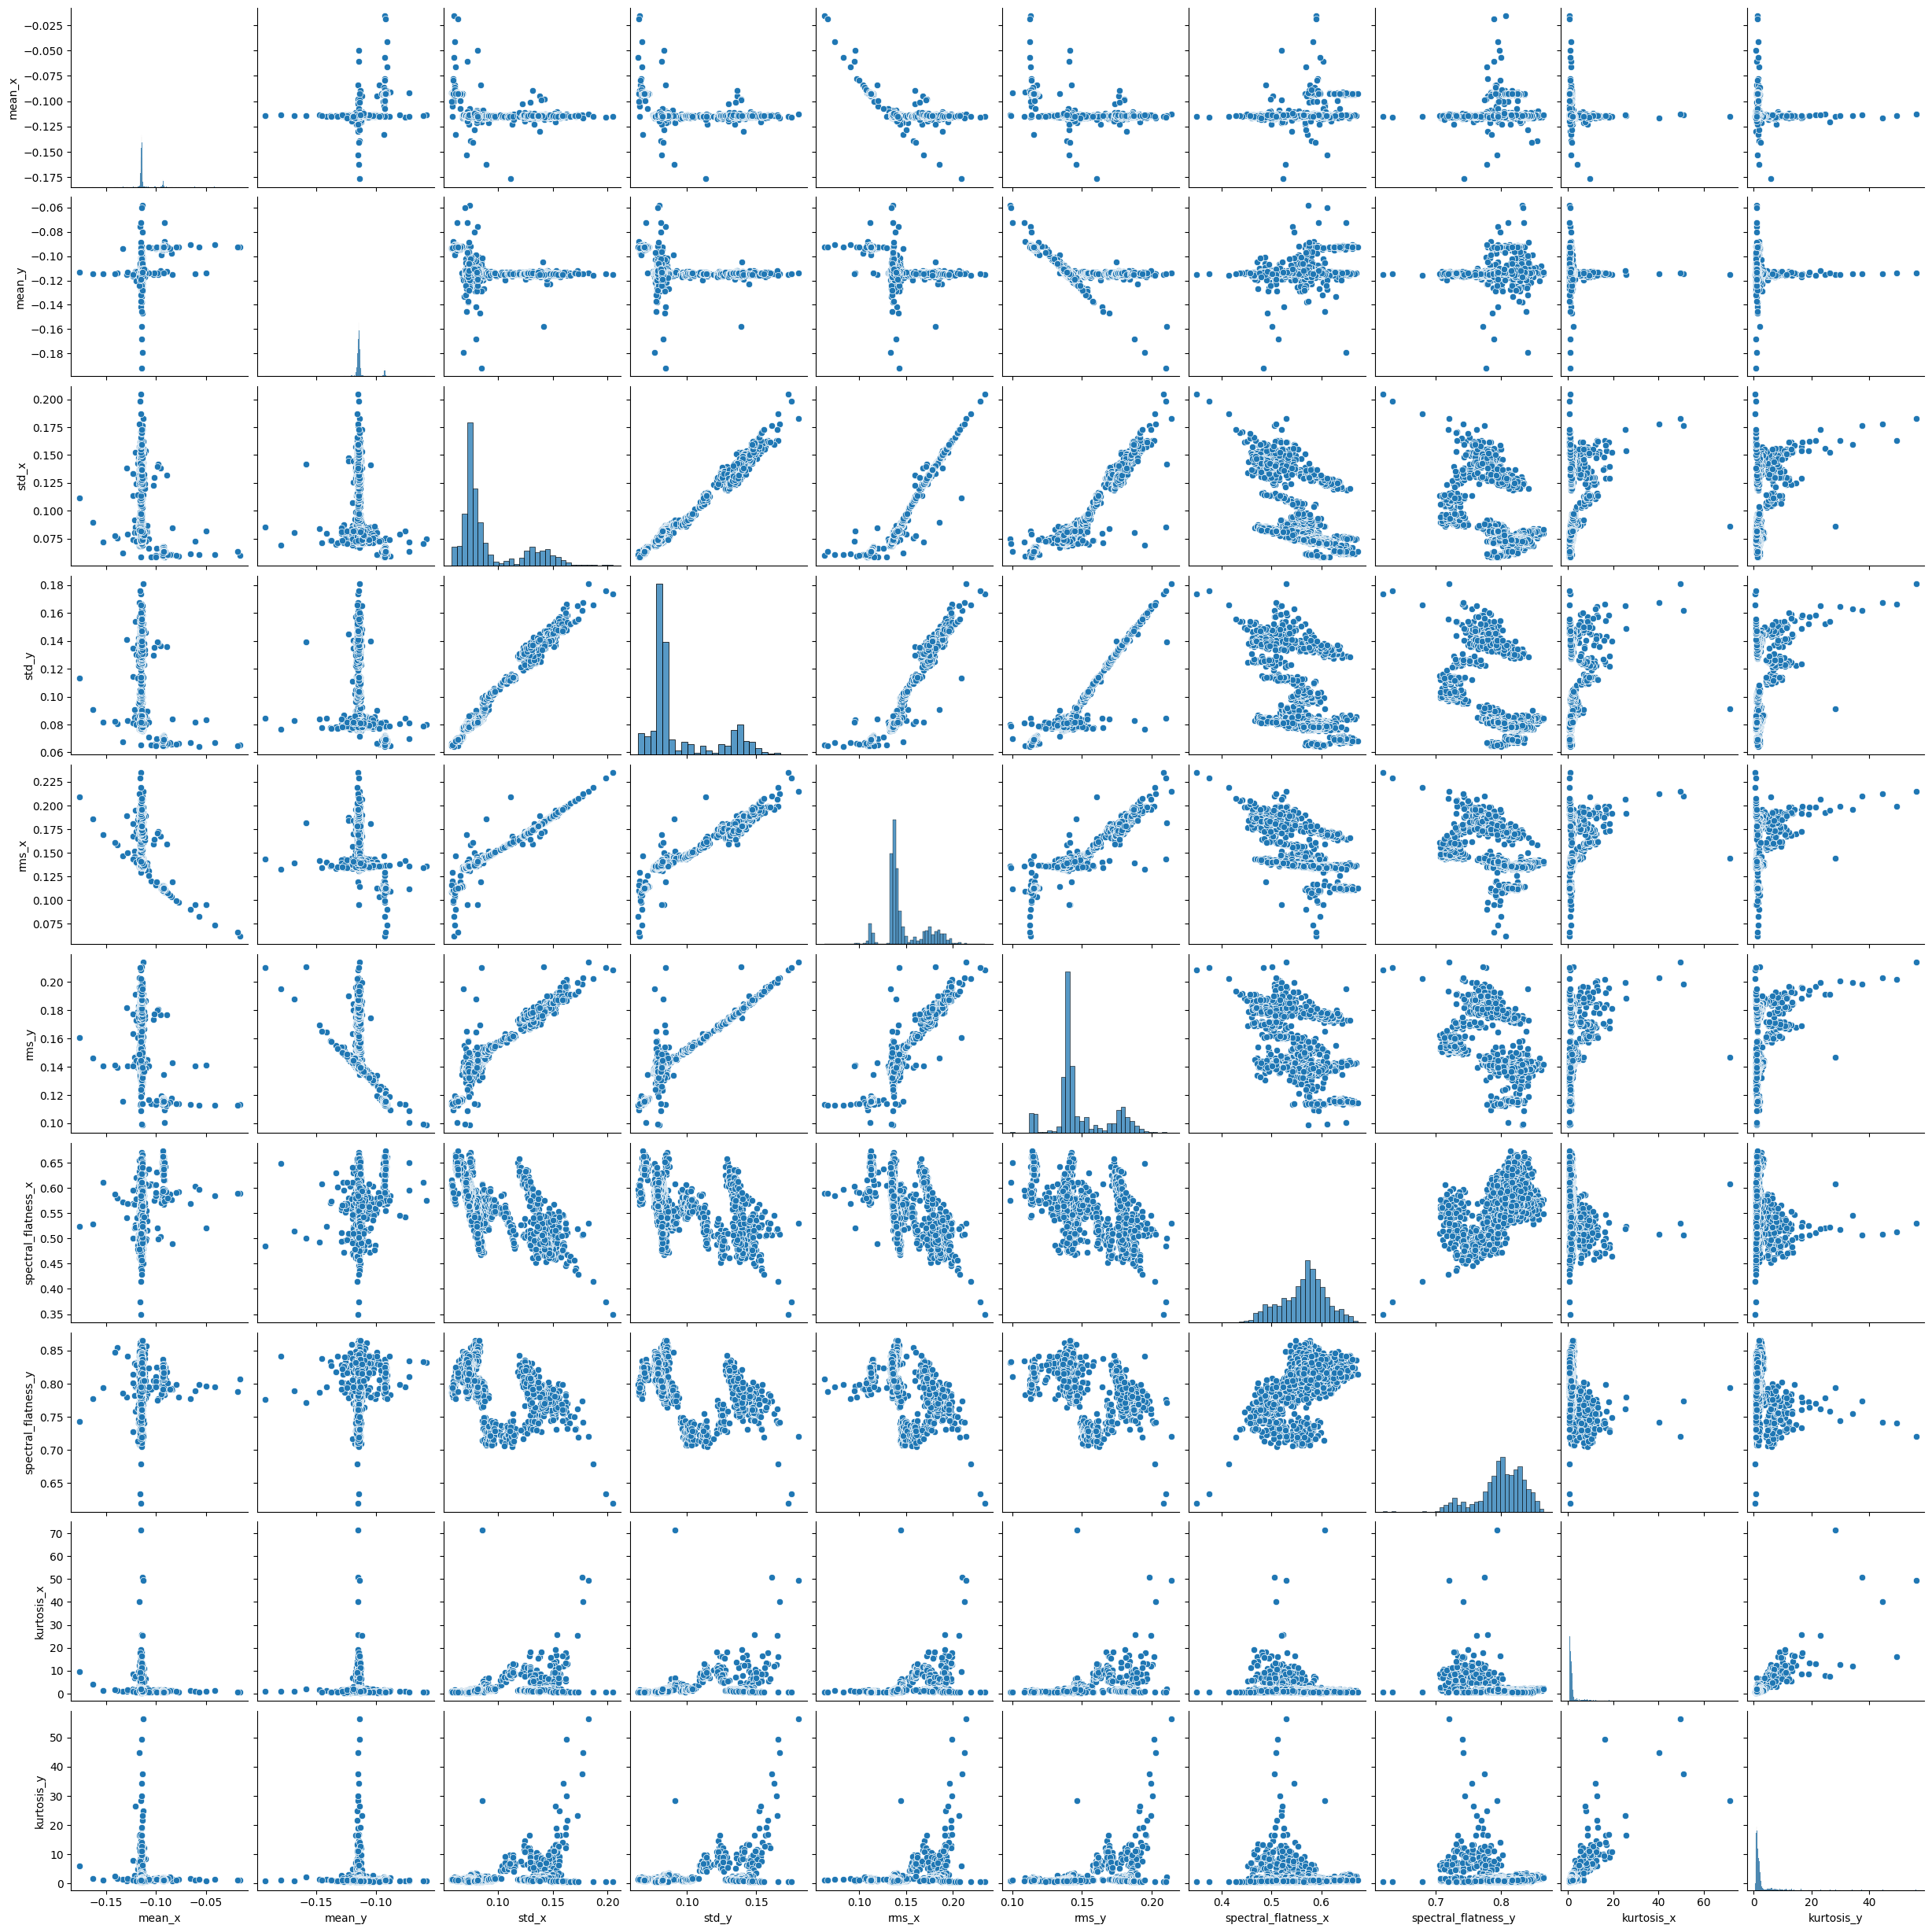

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(feature_df)
plt.show()



                       mean_x    mean_y     std_x     std_y     rms_x  \
mean_x               1.000000  0.592448 -0.241378 -0.254320 -0.483121   
mean_y               0.592448  1.000000 -0.254061 -0.263170 -0.386043   
std_x               -0.241378 -0.254061  1.000000  0.990512  0.965128   
std_y               -0.254320 -0.263170  0.990512  1.000000  0.958516   
rms_x               -0.483121 -0.386043  0.965128  0.958516  1.000000   
rms_y               -0.393315 -0.529896  0.946806  0.956863  0.957288   
spectral_flatness_x  0.297065  0.319091 -0.578365 -0.493245 -0.600110   
spectral_flatness_y  0.084263  0.118437 -0.512408 -0.506160 -0.476292   
kurtosis_x          -0.105963 -0.094181  0.410667  0.392797  0.398310   
kurtosis_y          -0.071808 -0.065406  0.442172  0.434612  0.423501   

                        rms_y  spectral_flatness_x  spectral_flatness_y  \
mean_x              -0.393315             0.297065             0.084263   
mean_y              -0.529896             0.31

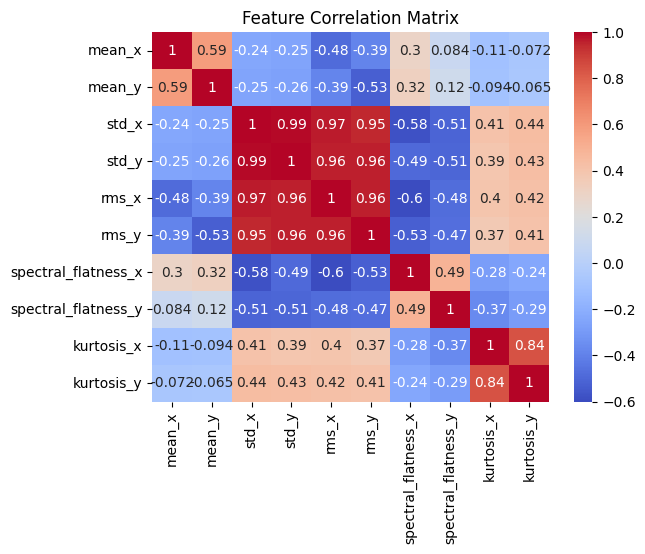

In [37]:

# Calculate the correlation matrix excluding the 'file' column
correlation_matrix = feature_df.drop(columns=['file']).corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = feature_df.drop(['file'], axis=1)  # Adjust this if you have a specific target column
y = feature_df['mean_x']  # Replace 'mean_x' with your actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
# print(classification_report(y_test, y_pred))


In [13]:
def acceleration_bearing_data(csv_data, x_or_y_direction=False, index=False):
    bearing_data = pd.read_csv(csv_data, delimiter=';')
    bearing_data['x_velocity'] = bearing_data['b4x'].diff()
    bearing_data['x_acceleration'] = bearing_data['x_velocity'].diff()
    bearing_data['y_velocity'] = bearing_data['b4y'].diff()
    bearing_data['y_acceleration'] = bearing_data['y_velocity'].diff()
    bearing_data = bearing_data.dropna()

    if not index:    
        return bearing_data
    
    # Make a function that, given an index, loads the corresponding sample and returns mean, standard deviation,
    # and root mean squared of both x and y acceleration.
    elif x_or_y_direction and index:
        if x_or_y_direction == 'x':
            print('Corresponding Sample:', bearing_data.loc[index, 'b4x'])
        elif x_or_y_direction == 'y':
            print('Corresponding Sample:', bearing_data.loc[index, 'b4y'])

        bearing_data['rms_x'] = np.sqrt(np.mean(bearing_data.x_acceleration**2))
        bearing_data['rms_y'] = np.sqrt(np.mean(bearing_data.y_acceleration**2))
        
        print('Mean of X-acceleration:', bearing_data.x_acceleration.mean())
        print('Mean of Y-acceleration:', bearing_data.y_acceleration.mean())
    
        print('Stdev of X-acceleration:', bearing_data.x_acceleration.std())
        print('Stdev of Y-acceleration:', bearing_data.y_acceleration.std())
        
        print('RMS of X-acceleration:', bearing_data.loc[index, 'rms_x'])
        print('RMS of Y-acceleration:', bearing_data.loc[index, 'rms_y'])


In [4]:
# To simplify the visualization, we made a function.
def viz_acceleration_bearing_data(csv_data):
    bearing_data = acceleration_bearing_data(csv_data)
    y0 = bearing_data.x_acceleration
    X = bearing_data.index

    plt.figure(figsize=(10, 5))
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.title(f'Acceleration in x-direction of Bearing 4 (Source = {csv_data})')
    plt.scatter(X, y0)

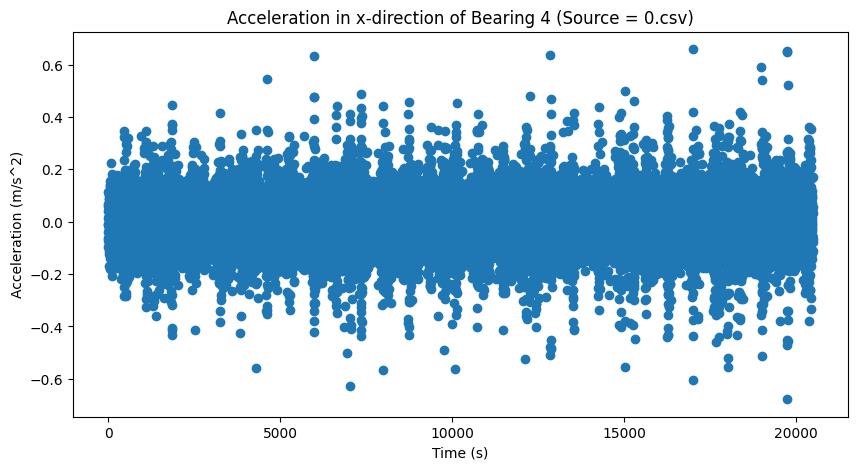

In [5]:
# Load the first sample (0.txt) and visualize the acceleration in the x direction of bearing 4. 
viz_acceleration_bearing_data('0.csv')

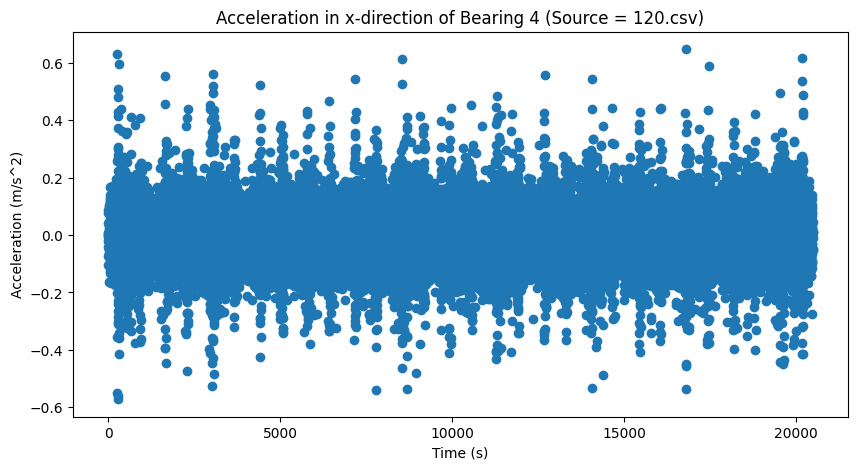

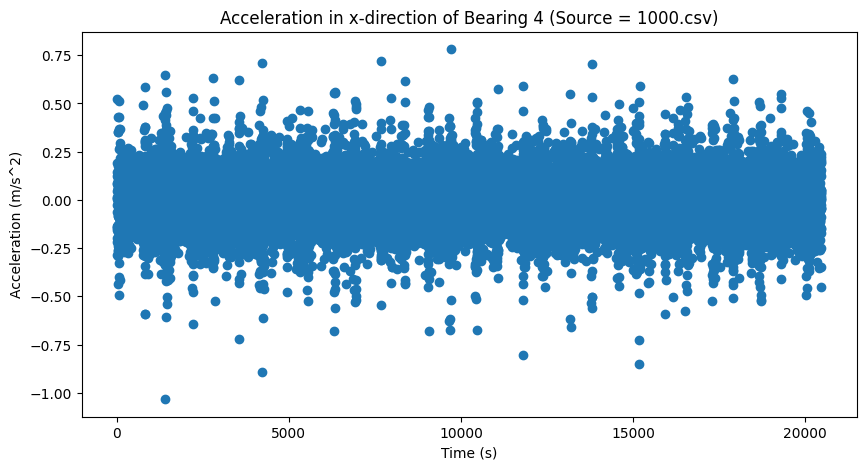

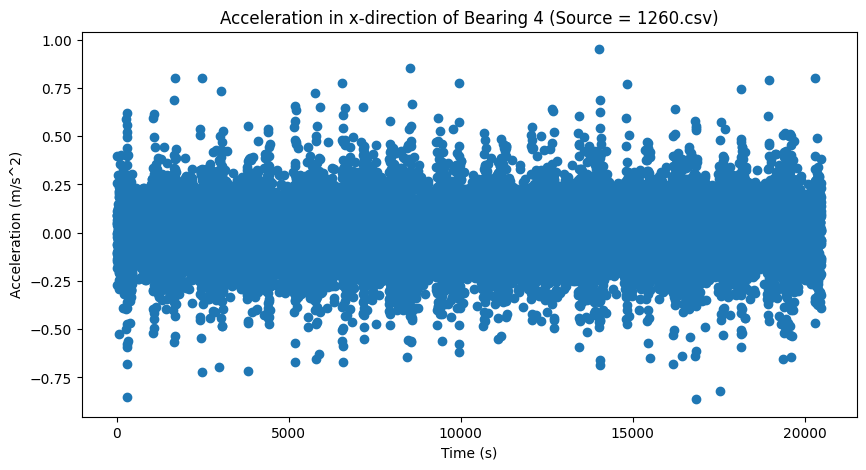

In [61]:
# Compare this visualization to 3 other samples from different degradation stages.
viz_acceleration_bearing_data('120.csv')
plt.show()
viz_acceleration_bearing_data('1000.csv')
plt.show()
viz_acceleration_bearing_data('1260.csv')